# This code uses the extracted embeddings to perform various classification tasks 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y = np.load('test_50_users_N_20.npy')
X = np.load('test_embeddings_50_users_N_20.npy')

y = pd.DataFrame(y)  # This line can be removed if y is already a DataFrame

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Updated for compatibility with newer versions of scikit-learn
encoder.fit(y)

y_encoded = encoder.transform(y)
print(y_encoded.shape)


(15000, 50)


# Multi-class

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the neural network architecture
model = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 30 neurons and ReLU activation
#   layers.Dense(64, activation='relu'),  # Fourth hidden layer with 35 neurons and ReLU activation
  layers.Dense(50, activation='softmax')  # Output layer with 30 neurons and softmax activation for multi-class classification
])


learning_rate = 0.0001

# Compile the model with Adam optimizer and learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mse', metrics=['accuracy'])


# Training
history = model.fit(X_train, y_train,
                                epochs=150,
                                batch_size=128,
                                shuffle=True,
                                validation_data=(X_test, y_test),
                                verbose=1)

Epoch 1/150


C:\Users\rahul\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0197 - loss: 0.0196 - val_accuracy: 0.0420 - val_loss: 0.0196
Epoch 2/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0498 - loss: 0.0196 - val_accuracy: 0.0910 - val_loss: 0.0195
Epoch 3/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1146 - loss: 0.0195 - val_accuracy: 0.1797 - val_loss: 0.0195
Epoch 4/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2040 - loss: 0.0195 - val_accuracy: 0.2913 - val_loss: 0.0194
Epoch 5/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3194 - loss: 0.0194 - val_accuracy: 0.3607 - val_loss: 0.0193
Epoch 6/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3770 - loss: 0.0193 - val_accuracy: 0.3990 - val_loss: 0.0192
Epoch 7/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4288 - loss: 0.0192 - val_accuracy: 0.4417 - val_loss: 0.0191
Epoch 8/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4719 - loss: 0.0191 - val_accuracy: 0.4747 - val_loss: 0.0

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9798 - loss: 0.0017 - val_accuracy: 0.9707 - val_loss: 0.0018
Epoch 52/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9766 - loss: 0.0017 - val_accuracy: 0.9710 - val_loss: 0.0017
Epoch 53/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9784 - loss: 0.0016 - val_accuracy: 0.9713 - val_loss: 0.0017
Epoch 54/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9797 - loss: 0.0015 - val_accuracy: 0.9717 - val_loss: 0.0017
Epoch 55/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9792 - loss: 0.0015 - val_accuracy: 0.9727 - val_loss: 0.0016
Epoch 56/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9798 - loss: 0.0015 - val_accuracy: 0.9730 - val_loss: 0.0016
Epoch 57/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9796 - loss: 0.0014 - val_accuracy: 0.9740 - val_loss: 0.0015
Epoch 58/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9796 - loss: 0.0014 - val_accuracy: 0.9750 - val_lo

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9901 - loss: 5.9579e-04 - val_accuracy: 0.9833 - val_loss: 7.3778e-04
Epoch 101/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 6.3156e-04 - val_accuracy: 0.9833 - val_loss: 7.3057e-04
Epoch 102/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9883 - loss: 6.2199e-04 - val_accuracy: 0.9840 - val_loss: 7.2161e-04
Epoch 103/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9902 - loss: 5.6849e-04 - val_accuracy: 0.9840 - val_loss: 7.1371e-04
Epoch 104/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9915 - loss: 5.4533e-04 - val_accuracy: 0.9847 - val_loss: 7.0582e-04
Epoch 105/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9899 - loss: 5.8287e-04 - val_accuracy: 0.9843 - val_loss: 6.9891e-04
Epoch 106/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9912 - loss: 5.5774e-04 - val_accuracy: 0.9847 - val_loss: 6.9155e-04
Epoch 107/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

Epoch 148/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9949 - loss: 3.6834e-04 - val_accuracy: 0.9900 - val_loss: 4.8614e-04
Epoch 149/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9949 - loss: 3.5371e-04 - val_accuracy: 0.9900 - val_loss: 4.8222e-04
Epoch 150/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9955 - loss: 3.3015e-04 - val_accuracy: 0.9900 - val_loss: 4.7853e-04


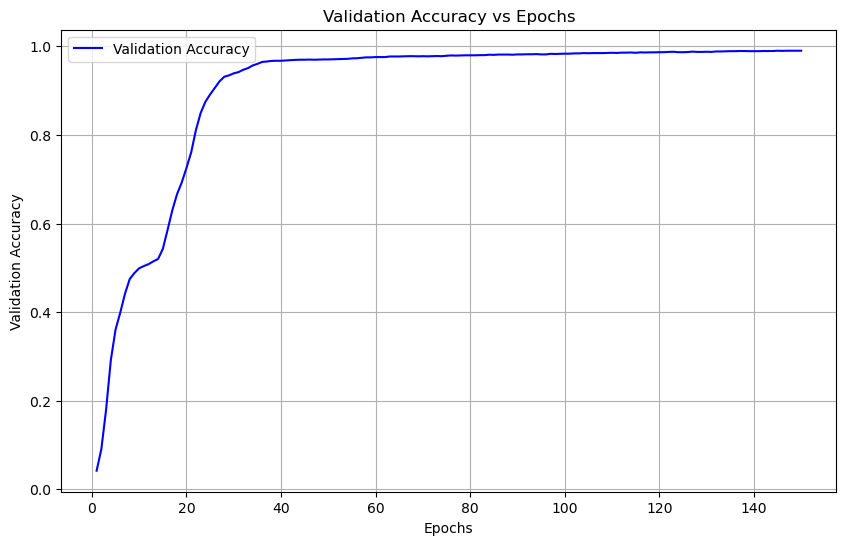

In [3]:
import matplotlib.pyplot as plt

# Extract the validation accuracy from the history object
val_acc = history.history['val_accuracy']
epochs = range(1, len(val_acc) + 1)

# Plot validation accuracy vs epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

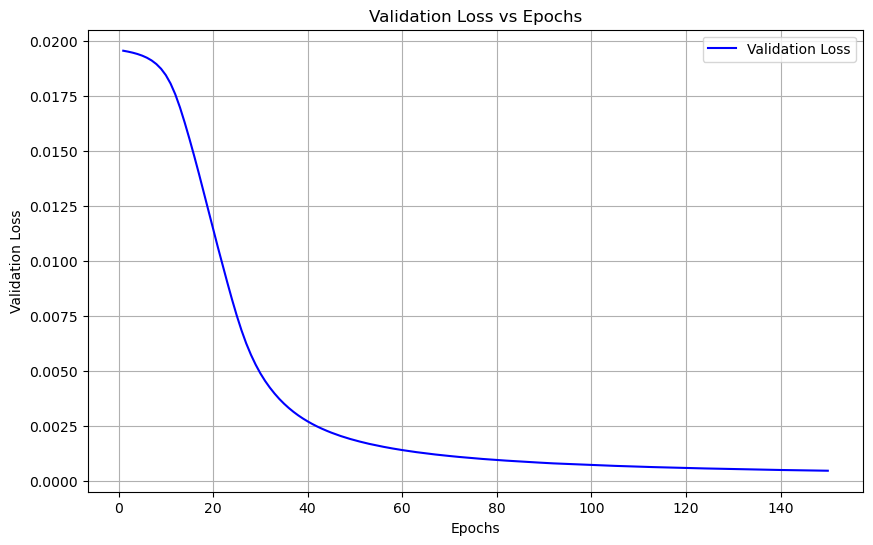

In [4]:
import matplotlib.pyplot as plt

# Extract the validation accuracy from the history object
val_loss = history.history['val_loss']
epochs = range(1, len(val_acc) + 1)

# Plot validation accuracy vs epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.grid(True)
plt.legend()
plt.show()

# One-Vs-all

In [96]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y = np.load('test_50_users_N_4.npy')-50
X = np.load('test_embeddings_50_users_N_4.npy')

In [97]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Assuming you have your data X and labels y

# Step 1: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the neural network architecture
def create_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classifier, output either 0 or 1
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Step 3: Train one-vs-all binary classifiers
num_classes = len(np.unique(y))  # Assuming y contains integer labels from 0 to num_classes-1
# num_classes = 1
binary_classifiers = []
History = []

for class_label in range(num_classes):
# for class_label in [0]:
    print("Class :",class_label)
    # Create binary labels: 1 for current class, 0 for all other classes
    y_train_binary = np.where(y_train == class_label, 1, 0)
    y_test_binary = np.where(y_test == class_label, 1, 0)
    
    
    # Create and train binary classifier for current class
    model = create_model(input_shape=X_train.shape[1:])
    history = model.fit(X_train, y_train_binary, epochs=10, batch_size=128, verbose=1,shuffle=True)  # Adjust epochs and batch_size as needed
    binary_classifiers.append(model)
    History.append(history)

Class : 0
Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8144 - loss: 0.4986
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9838 - loss: 0.0573
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9805 - loss: 0.0411
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9869 - loss: 0.0319
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9894 - loss: 0.0286
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0249
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9924 - loss: 0.0228
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9930 - loss: 0.0208
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0188
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9939 - loss: 0.0171
Class : 1
Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8112 - loss: 0.4964
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9944 - loss: 0.0185
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9953 - loss: 0.0147
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9959 - loss: 0.0154
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0143
Class : 14
Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8871 - loss: 0.4792
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9792 - loss: 0.0725
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9789 - loss: 0.0449
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9896 - loss: 0.0267
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 - loss: 0.0174
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0123
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0092
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9967 - loss

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9812 - loss: 0.0617
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9806 - loss: 0.0558
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0456
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9793 - loss: 0.0499
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.0448
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9799 - loss: 0.0449
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0384
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9831 - loss: 0.0410
Class : 28
Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9227 - loss: 0.4729
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9799 - loss: 0.0696
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9780 - loss: 0.0538
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9808 - loss

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9970 - loss: 0.0101
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9960 - loss: 0.0109
Class : 41
Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9685 - loss: 0.4382
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0581
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9801 - loss: 0.0444
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9822 - loss: 0.0330
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.0260
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9925 - loss: 0.0200
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9933 - loss: 0.0179
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9953 - loss: 0.0146
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9947 - loss: 0.0153
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - los

In [98]:
# Step 4: Combine predictions from all binary classifiers
def predict_multi_class(X, binary_classifiers):
    # Initialize empty array to store predictions
    predictions = np.zeros((X.shape[0], num_classes))
    
    # Generate predictions for each binary classifier
    for class_label, model in enumerate(binary_classifiers):
        # Get probability of positive class (current class)
        probability = model.predict(X)
        predictions[:, class_label] = probability.flatten()
    
    predicted_classes = np.argmax(predictions, axis=1)
    return predicted_classes

# Step 5: Make predictions on the testing set
y_pred = predict_multi_class(X_test, binary_classifiers)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test.transpose())
print("Accuracy:", accuracy)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
94/94 ━━━━━━━━━━━━━━━━━━━

In [95]:
import numpy as np

y_pred = y_pred.flatten()
y_test = y_test.flatten()

# # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
# TP = np.sum((y_pred == 1) & (y_test == 1))
# TN = np.sum((y_pred == 0) & (y_test == 0))
# FP = np.sum((y_pred == 1) & (y_test == 0))
# FN = np.sum((y_pred == 0) & (y_test == 1))

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = np.sum((y_pred == y_test))
# TN = np.sum((y_pred == 0) & (y_test == 0))
# FP = np.sum((y_pred == 1) & (y_test == 0))
# FN = np.sum((y_pred == 0) & (y_test == 1))

# # Calculate TPR and TNR
# TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
# TNR = TN / (TN + FP) if (TN + FP) != 0 else 0

# print(f"True Positive Rate (TPR): {TPR}")
# print(f"True Negative Rate (TNR): {TNR}")
TP

2400

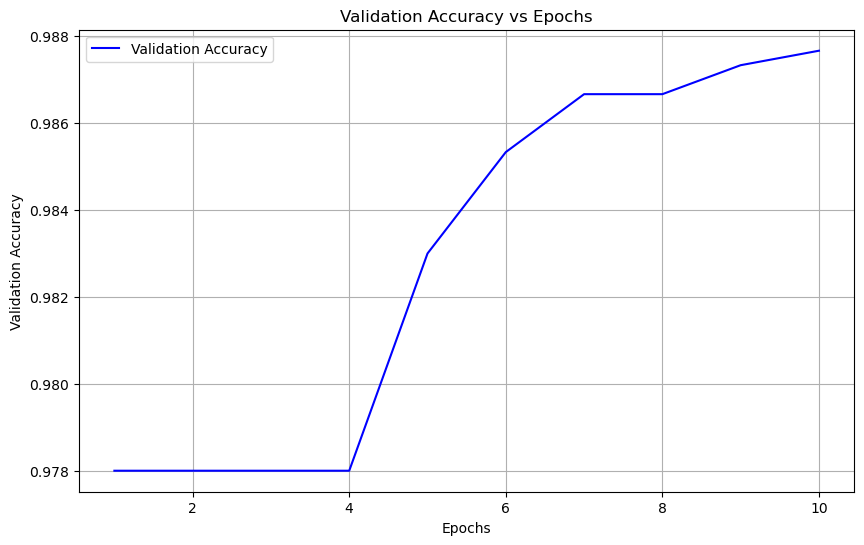

In [87]:
import matplotlib.pyplot as plt

history = History[10]
# Extract the validation accuracy from the history object
val_acc = history.history['val_accuracy']
epochs = range(1, len(val_acc) + 1)

# Plot validation accuracy vs epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# One Class

In [222]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# y = np.load('test_50_users_N_20.npy')-50
# X = np.load('test_embeddings_50_users_N_20.npy')

y = np.load('train_50_users_N_20_600.npy')
X = np.load('train_embeddings_50_users_N_20_600.npy')

y = pd.DataFrame(y)  # This line can be removed if y is already a DataFrame

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Updated for compatibility with newer versions of scikit-learn
encoder.fit(y)

y_encoded = encoder.transform(y)
print(y_encoded.shape)


(30600, 51)


In [223]:
import numpy as np

def remove_outliers_and_find_average(data, outlier_bound=2):
    median = np.median(data)
    std = np.std(data)

    upper_bound = median + outlier_bound * std
    lower_bound = median - outlier_bound * std

    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    if filtered_data:
        average = np.mean(filtered_data)
    else:
        average = np.nan  
    
    return filtered_data, average

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import pandas as pd


y_flat = y.to_numpy().ravel()
TPR = []
TNR = []
for normal_class_label in range(0,50):
#     print(normal_class_label)
    X_normal = X[y_flat == normal_class_label]  # Inliers
    X_outliers = X[y_flat != normal_class_label]  # Outliers

    # Step 1: Split normal user data into training and testing sets
    X_train, X_test_inliers = train_test_split(X_normal, test_size=0.2, random_state=42)

    # Combine inliers and outliers for testing
    X_test = np.concatenate([X_test_inliers, X_outliers], axis=0)
    y_test = np.concatenate([np.ones(len(X_test_inliers)), np.zeros(len(X_outliers))], axis=0)  # 1 for inliers, 0 for outliers

    # Step 2: Define the One-Class SVM model
#     model = OneClassSVM(kernel='rbf', nu=0.015, gamma='auto')
#     model = OneClassSVM(kernel='poly', nu=0.0001, degree=10, coef0=100)
#     model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, random_state=42)
    model = EllipticEnvelope(contamination=0.0045, random_state=42)

    model.fit(X_train)
    y_pred_test = model.predict(X_test)

    y_pred_test_binary = np.where(y_pred_test == 1, 1, 0)

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test_binary).ravel()

    # Calculate TPR and TNR
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (tn + fp)  # True Negative Rate
    TPR.append(tpr)
    TNR.append(tnr)

    
filtered_tpr, average_tpr = remove_outliers_and_find_average(TPR)
filtered_tnr, average_tnr = remove_outliers_and_find_average(TNR)

print("Number of Users for TPR", len(filtered_tpr))
print("Number of Users for TNR:", len(filtered_tnr))
print("Average TPR:", 100*(1- average_tpr))
print("Average TNR:", 100*(1-average_tnr))

Number of Users for TPR 47
Number of Users for TNR: 45
Average TPR: 0.5673758865248235
Average TNR: 0.5075555555555389


# Apply PCA to reduce dimension and then applying One Class Classification

In [160]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y = np.load('test_50_users_N_20.npy')-50
X = np.load('test_embeddings_50_users_N_20.npy')

# y = np.load('train_50_users_N_20_600.npy')
# X = np.load('train_embeddings_50_users_N_20_600.npy')

y = pd.DataFrame(y)  # This line can be removed if y is already a DataFrame

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Updated for compatibility with newer versions of scikit-learn
encoder.fit(y)

y_encoded = encoder.transform(y)
print(y_encoded.shape)


(15000, 50)


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
import numpy as np

y_flat = y.to_numpy().ravel()
TPR = []
TNR = []

# Apply PCA to reduce dimensionality to 5 components
pca = PCA(n_components=30)

for normal_class_label in range(0, 50):
    X_normal = X[y_flat == normal_class_label]  # Inliers
    X_outliers = X[y_flat != normal_class_label]  # Outliers

    # Step 1: Split normal user data into training and testing sets
    X_train, X_test_inliers = train_test_split(X_normal, test_size=0.2, random_state=42)

    # Combine inliers and outliers for testing
    X_test = np.concatenate([X_test_inliers, X_outliers], axis=0)
    y_test = np.concatenate([np.ones(len(X_test_inliers)), np.zeros(len(X_outliers))], axis=0)  # 1 for inliers, 0 for outliers

    # Step 2: Apply PCA to training and testing data
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Step 3: Define the One-Class SVM model
#     model = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
#     model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.001, random_state=42)
    model = EllipticEnvelope(contamination=0.0065, assume_centered=False, random_state=42)
    model.fit(X_train_pca)

    # Step 4: Predict on the test set
    y_pred_test = model.predict(X_test_pca)

    y_pred_test_binary = np.where(y_pred_test == 1, 1, 0)

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test_binary).ravel()

    # Calculate TPR and TNR
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (tn + fp)  # True Negative Rate
    TPR.append(tpr)
    TNR.append(tnr)

print(f"FNR: {100*(1-sum(TPR) / len(TPR))}")
print(f"FPR: {100*(1-sum(TNR) / len(TNR))}")

print(f"FNR Median: {100*(1-np.median(TPR))}")
print(f"FPR Median: {100*(1-np.median(TNR))}")

FNR: 0.9999999999999676
FPR: 1.0145578231292363
FNR Median: 0.0
FPR Median: 0.10544217687075141


# Limiting to 10 Users

In [371]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y = np.load('test_50_users_N_20.npy')-50
X = np.load('test_embeddings_50_users_N_20.npy')

# y = np.load('train_50_users_N_20_600.npy')
# X = np.load('train_embeddings_50_users_N_20_600.npy')

In [372]:
import numpy as np
import random

def filter_data_by_users(X, y, num_users=10):
    # Ensure y is a 1D array for indexing
    y = np.ravel(y)

    unique_users = np.unique(y)
    selected_users = random.sample(list(unique_users), num_users)

    mask = np.isin(y, selected_users)
    filtered_X = X[mask]
    filtered_y = y[mask]

    return filtered_X, filtered_y

# Example usage
X, y = filter_data_by_users(X, y, num_users=49)
y = pd.DataFrame(y)  # This line can be removed if y is already a DataFrame

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Updated for compatibility with newer versions of scikit-learn
encoder.fit(y)

y_encoded = encoder.transform(y)
print(y_encoded.shape)

(14700, 49)


In [379]:
import numpy as np

def remove_outliers_and_find_average(data, outlier_bound=1.5):
    median = np.median(data)
    std = np.std(data)

    upper_bound = median + outlier_bound * std
    lower_bound = median - outlier_bound * std

    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    if filtered_data:
        average = np.mean(filtered_data)
    else:
        average = np.nan  
    
    return filtered_data, average

In [380]:
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import pandas as pd


y_flat = y.to_numpy().ravel()
TPR = []
TNR = []
for normal_class_label in np.unique(y_flat):
#     print(normal_class_label)
    X_normal = X[y_flat == normal_class_label]  # Inliers
    X_outliers = X[y_flat != normal_class_label]  # Outliers

    # Step 1: Split normal user data into training and testing sets
    X_train, X_test_inliers = train_test_split(X_normal, test_size=0.2, random_state=42)

    # Combine inliers and outliers for testing
    X_test = np.concatenate([X_test_inliers, X_outliers], axis=0)
    y_test = np.concatenate([np.ones(len(X_test_inliers)), np.zeros(len(X_outliers))], axis=0)  # 1 for inliers, 0 for outliers

    # Step 2: Define the One-Class SVM model
#     model = OneClassSVM(kernel='rbf', nu=0.015, gamma='auto')
#     model = OneClassSVM(kernel='poly', nu=0.0001, degree=10, coef0=100)
#     model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, random_state=42)
    model = EllipticEnvelope(contamination=0.005, random_state=42)

    model.fit(X_train)
    y_pred_test = model.predict(X_test)

    y_pred_test_binary = np.where(y_pred_test == 1, 1, 0)

    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test_binary).ravel()

    # Calculate TPR and TNR
    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (tn + fp)  # True Negative Rate
    TPR.append(tpr)
    TNR.append(tnr)

    
filtered_tpr, average_tpr = remove_outliers_and_find_average(TPR)
filtered_tnr, average_tnr = remove_outliers_and_find_average(TNR)

print("Number of Users for TPR", len(filtered_tpr))
print("Number of Users for TNR:", len(filtered_tnr))
print("Average TPR:", 100*(1- average_tpr))
print("Average TNR:", 100*(1-average_tnr))

Number of Users for TPR 45
Number of Users for TNR: 41
Average TPR: 0.5555555555555536
Average TNR: 0.4412262872628858
